In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-learning-24-hrs-hackathon/sample_submission.csv
/kaggle/input/machine-learning-24-hrs-hackathon/train_SJC.csv
/kaggle/input/machine-learning-24-hrs-hackathon/Test_SJC.csv


#                     **Predict Workers Compensation Claims**

This is an actual dataset with 36176 entries and 15 variables.
The task is to predict total claims payments by the insurance company for various accident insurers. The target variable here is UltimateIncurredClaimCost. There are 14 independent variables. They are -

- ClaimNumber: Unique policy identifier
- DateTimeOfAccident: Date and time of accident
- DateReported: Date that accident was reported
- Age: Age of worker
- Gender: Gender of worker
- MaritalStatus: Martial status of worker. (M)arried, (S)ingle, (U)unknown.
- DependentChildren: The number of dependent children
- DependentsOther: The number of dependants excluding children
- WeeklyWages: Total weekly wage
- PartTimeFullTime: Binary (P) or (F)
- HoursWorkedPerWeek: Total hours worked per week
- DaysWorkedPerWeek: Number of days worked per week
- ClaimDescription: Free text description of the claim
- InitialIncurredClaimCost: Initial estimate by the insurer of the claim cost
This is a Regression problem.

In [2]:
#import all libraries
import pandas as pd  #(DAta Analytical Library)
import numpy as np   #(Fast linear algebra library)
import matplotlib.pyplot as plt  #(visualisaton)
import seaborn as sns #(Statitistical Viz)
import sklearn.preprocessing as pre
import sklearn.model_selection as ms
import sklearn.linear_model as ln
import sklearn.metrics as mt



# Step 1 - Data Collection

In [3]:
#Load the data
df=pd.read_csv("../input/machine-learning-24-hrs-hackathon/train_SJC.csv")

In [4]:
df.head()

,Unnamed: 0,Unnamed: 1,DateReported,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,DependentsOther,Unnamed: 8,Unnamed: 9,Unnamed: 10,DaysWorkedPerWeek,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,ClaimNumber,DateTimeOfAccident,NaN,Age,Gender,MaritalStatus,DependentChildren,NaN,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,NaN,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0.0,500,F,38,5.0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0.0,509.34,F,37.5,5.0,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0.0,709.1,F,38,5.0,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
4,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0.0,555.46,F,38,5.0,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.48717


# Step 2 - Data pre processing
- Data cleaning
- Data transformaton
- Data integration

In [5]:
#changing column names
df_new = df.rename(columns={'Unnamed: 0': 'ClaimNumber','Unnamed: 1':'DateTimeOfAccident','Unnamed: 3':'Age',
                             'Unnamed: 4':'Gender','Unnamed: 5':'MaritalStatus','Unnamed: 6':'DependentChildren',
                             'Unnamed: 8':'WeeklyWages','Unnamed: 9':'PartTimeFullTime','Unnamed: 10':'HoursWorkedPerWeek',
                             'Unnamed: 12':'ClaimDescription','Unnamed: 13':'InitialIncurredClaimsCost',
                            'Unnamed: 14':'UltimateIncurredClaimCost'})

In [6]:
df_new.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredClaimsCost,UltimateIncurredClaimCost
0,ClaimNumber,DateTimeOfAccident,NaN,Age,Gender,MaritalStatus,DependentChildren,NaN,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,NaN,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0.0,500,F,38,5.0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0.0,509.34,F,37.5,5.0,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0.0,709.1,F,38,5.0,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
4,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0.0,555.46,F,38,5.0,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.48717


In [7]:
#dropping header row
header_row=0
df_new=df_new.drop(header_row)

In [8]:
#Resetting index
df_new=df_new.reset_index(drop=True)

Dataframe Summary

In [9]:
df_new.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36176 entries, 0 to 36175
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                36176 non-null  object 
 1   DateTimeOfAccident         36176 non-null  object 
 2   DateReported               36176 non-null  object 
 3   Age                        36176 non-null  object 
 4   Gender                     36176 non-null  object 
 5   MaritalStatus              36154 non-null  object 
 6   DependentChildren          36176 non-null  object 
 7   DependentsOther            36176 non-null  float64
 8   WeeklyWages                36120 non-null  object 
 9   PartTimeFullTime           36176 non-null  object 
 10  HoursWorkedPerWeek         36127 non-null  object 
 11  DaysWorkedPerWeek          36176 non-null  float64
 12  ClaimDescription           36176 non-null  object 
 13  InitialIncurredClaimsCost  36176 non-null  obj

In [10]:
#change dtypes
df_new['UltimateIncurredClaimCost']= df_new['UltimateIncurredClaimCost'].astype('float64') 
df_new['InitialIncurredClaimsCost']=df_new['InitialIncurredClaimsCost'].astype('float64')
df_new['HoursWorkedPerWeek']=df_new['HoursWorkedPerWeek'].astype('float64')
df_new['WeeklyWages']=df_new['WeeklyWages'].astype('float64')
df_new['Age']=df_new['Age'].astype('float64').astype('int64')
df_new['DependentChildren']=df_new['DependentChildren'].astype('float64').astype('int64')
df_new['DependentsOther']=df_new['DependentsOther'].astype('int64')
df_new['DateTimeOfAccident']=pd.to_datetime(df_new['DateTimeOfAccident'])  #transform to date time object
df_new['DateReported']=pd.to_datetime(df_new['DateReported'])  #transform to date time object


In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36176 entries, 0 to 36175
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   ClaimNumber                36176 non-null  object             
 1   DateTimeOfAccident         36176 non-null  datetime64[ns, UTC]
 2   DateReported               36176 non-null  datetime64[ns, UTC]
 3   Age                        36176 non-null  int64              
 4   Gender                     36176 non-null  object             
 5   MaritalStatus              36154 non-null  object             
 6   DependentChildren          36176 non-null  int64              
 7   DependentsOther            36176 non-null  int64              
 8   WeeklyWages                36120 non-null  float64            
 9   PartTimeFullTime           36176 non-null  object             
 10  HoursWorkedPerWeek         36127 non-null  float64            
 11  Da

Data Summary

In [12]:
df_new.describe() #distributed statistics of the data

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredClaimsCost,UltimateIncurredClaimCost
count,36176.000000,36176.000000,36176.000000,36120.000000,36127.000000,36176.000000,36176.000000,3.617600e+04
mean,33.795196,0.121296,0.009537,416.471426,37.766820,4.905794,7743.593874,1.095282e+04
std,12.114729,0.525395,0.106163,243.875364,12.494323,0.547077,18223.698531,3.529614e+04
min,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.218868e+02
25%,23.000000,0.000000,0.000000,200.000000,38.000000,5.000000,700.000000,9.257424e+02
50%,32.000000,0.000000,0.000000,393.365000,38.000000,5.000000,2000.000000,3.373862e+03
75%,43.000000,0.000000,0.000000,500.000000,40.000000,5.000000,9500.000000,8.186852e+03
max,79.000000,9.000000,3.000000,7497.000000,640.000000,7.000000,830000.000000,4.027136e+06


Check for Missing Values

In [13]:
df_new.isnull().sum()

ClaimNumber                   0
DateTimeOfAccident            0
DateReported                  0
Age                           0
Gender                        0
MaritalStatus                22
DependentChildren             0
DependentsOther               0
WeeklyWages                  56
PartTimeFullTime              0
HoursWorkedPerWeek           49
DaysWorkedPerWeek             0
ClaimDescription              0
InitialIncurredClaimsCost     0
UltimateIncurredClaimCost     0
dtype: int64

**Missing values in 'Marital Status','WeeklyWages' and 'HoursWorkedPerWeek'**

In [14]:
#Counts categorical values
#1.Gender
df_new['Gender'].value_counts()

M    27919
F     8256
U        1
Name: Gender, dtype: int64

more males

In [15]:
#2.MaritalStatus
df_new['MaritalStatus'].value_counts()

S    17450
M    15162
U     3542
Name: MaritalStatus, dtype: int64

In [16]:
#3.PartTimeFullTime
df_new['PartTimeFullTime'].value_counts()

F    32917
P     3259
Name: PartTimeFullTime, dtype: int64

## Missing Value Treatment

In [17]:
df_new.columns

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender',
       'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages',
       'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'ClaimDescription', 'InitialIncurredClaimsCost',
       'UltimateIncurredClaimCost'],
      dtype='object')

In [18]:
df_new.isnull().sum()

ClaimNumber                   0
DateTimeOfAccident            0
DateReported                  0
Age                           0
Gender                        0
MaritalStatus                22
DependentChildren             0
DependentsOther               0
WeeklyWages                  56
PartTimeFullTime              0
HoursWorkedPerWeek           49
DaysWorkedPerWeek             0
ClaimDescription              0
InitialIncurredClaimsCost     0
UltimateIncurredClaimCost     0
dtype: int64

In [19]:
#Replacing by modal value
df_new['MaritalStatus']=df_new['MaritalStatus'].fillna(df_new['MaritalStatus'].mode()[0])

In [20]:
df_new['WeeklyWages'].describe()

count    36120.000000
mean       416.471426
std        243.875364
min          1.000000
25%        200.000000
50%        393.365000
75%        500.000000
max       7497.000000
Name: WeeklyWages, dtype: float64

<AxesSubplot:xlabel='WeeklyWages'>

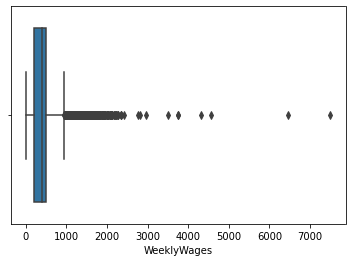

In [21]:
sns.boxplot(data=df_new,x='WeeklyWages')

Outliers in WeeklyWages so impute my median value

In [22]:
#Replacing by median
df_new['WeeklyWages']=df_new['WeeklyWages'].fillna(df_new['WeeklyWages'].median())

<AxesSubplot:xlabel='HoursWorkedPerWeek'>

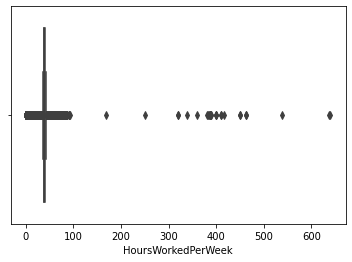

In [23]:
sns.boxplot(data=df_new,x='HoursWorkedPerWeek')

Outliers in HoursWorkedPerWeek so impute by median value

In [24]:
#Replacing by median
df_new['HoursWorkedPerWeek']=df_new['HoursWorkedPerWeek'].fillna(df_new['HoursWorkedPerWeek'].median())

In [25]:
df_new.isnull().sum()

ClaimNumber                  0
DateTimeOfAccident           0
DateReported                 0
Age                          0
Gender                       0
MaritalStatus                0
DependentChildren            0
DependentsOther              0
WeeklyWages                  0
PartTimeFullTime             0
HoursWorkedPerWeek           0
DaysWorkedPerWeek            0
ClaimDescription             0
InitialIncurredClaimsCost    0
UltimateIncurredClaimCost    0
dtype: int64

# Step 3 - EDA

In [26]:
#Creating sets of numerical and categorical variables
num_df=df_new.select_dtypes(include=[int,float])
cat_df=df_new.select_dtypes(exclude=[int,float])

In [27]:
num_df.describe()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredClaimsCost,UltimateIncurredClaimCost
count,36176.000000,36176.000000,36176.000000,36176.000000,36176.000000,36176.000000,36176.000000,3.617600e+04
mean,33.795196,0.121296,0.009537,416.435657,37.767136,4.905794,7743.593874,1.095282e+04
std,12.114729,0.525395,0.106163,243.688220,12.485861,0.547077,18223.698531,3.529614e+04
min,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.218868e+02
25%,23.000000,0.000000,0.000000,200.000000,38.000000,5.000000,700.000000,9.257424e+02
50%,32.000000,0.000000,0.000000,393.365000,38.000000,5.000000,2000.000000,3.373862e+03
75%,43.000000,0.000000,0.000000,500.000000,40.000000,5.000000,9500.000000,8.186852e+03
max,79.000000,9.000000,3.000000,7497.000000,640.000000,7.000000,830000.000000,4.027136e+06


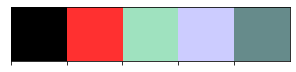

In [28]:
#Univariate Analysis
#Color palette
myPal = ["#000000", "#FF3030","#9FE2BF", "#CCCCFF", "#668B8B" ]  # creating color palette
sns.set_palette(myPal)
sns.palplot(sns.color_palette())

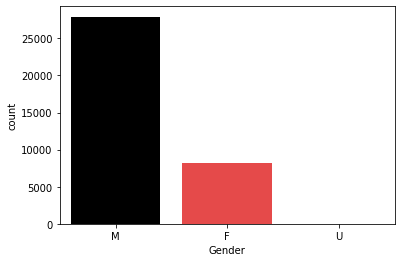

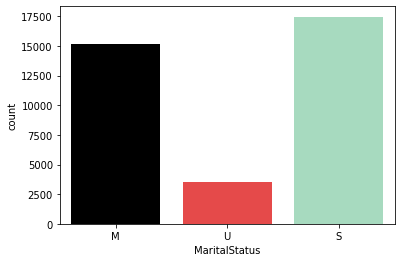

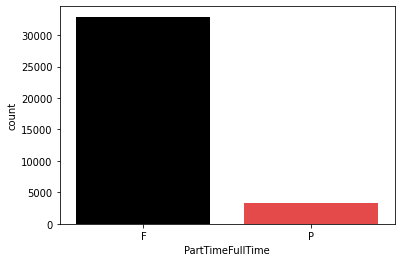

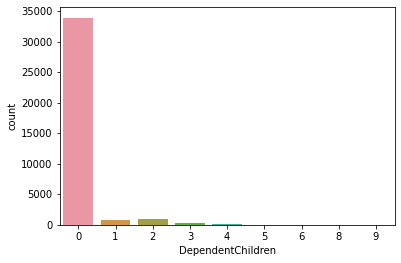

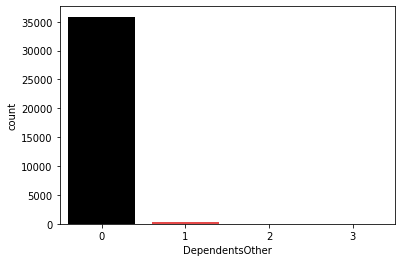

In [29]:
#categorical variables
lst = ['Gender',  'MaritalStatus', 'PartTimeFullTime', 'DependentChildren', 'DependentsOther']
for i in lst:
    plt.figure()
    sns.countplot(x=i, data=df_new)

- Insurers in the dataset mostly are males(77% are males).
- More Single Insurers, followed by married then status unknown.
- More Insurers are full time workers than doing part time jobs.
- For most insurers there are no dependent children.
- Also most insurers are not dependent on any relations.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

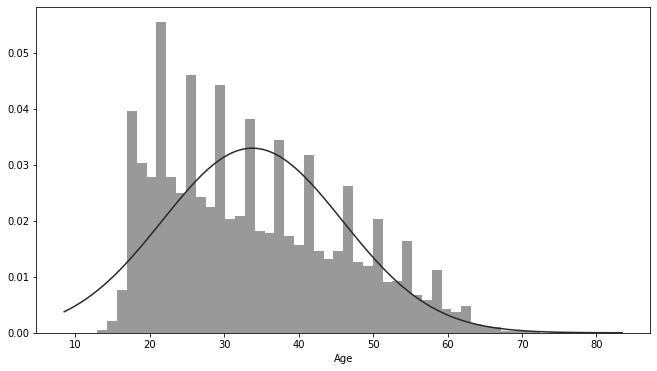

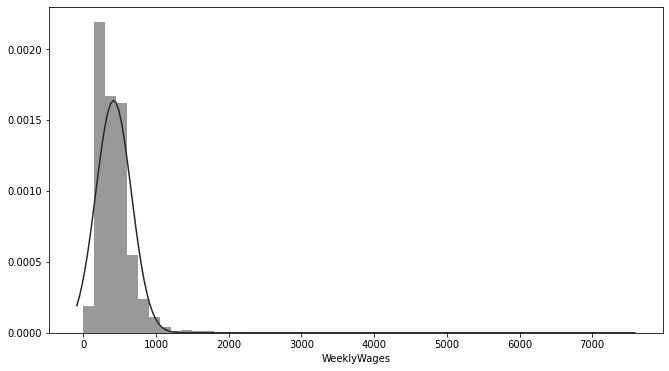

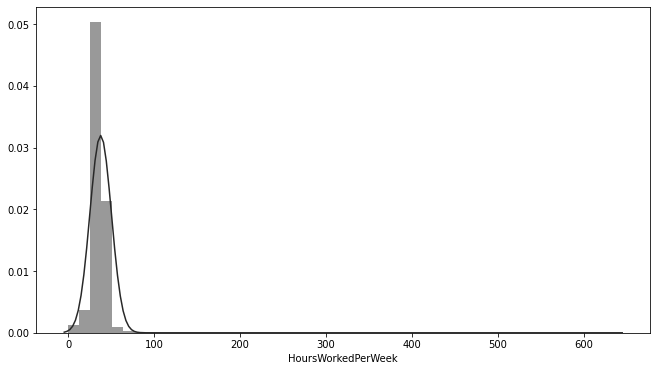

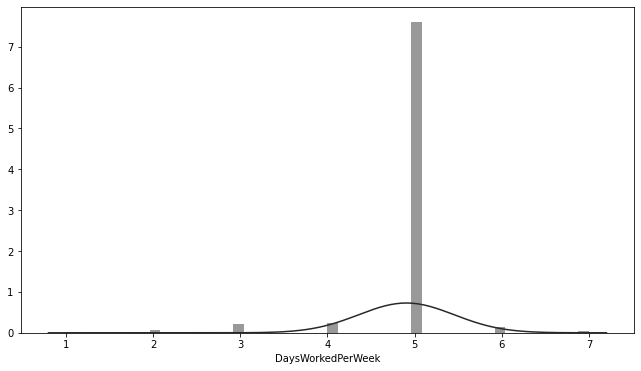

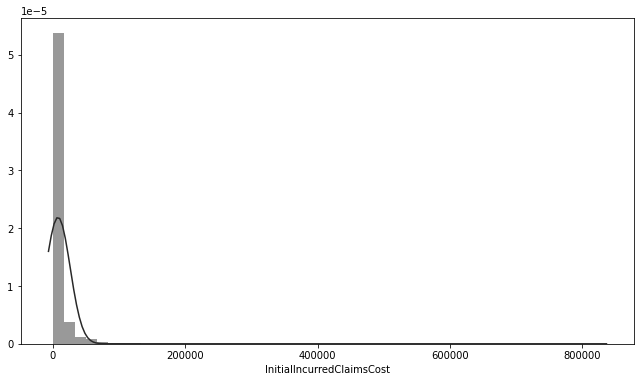

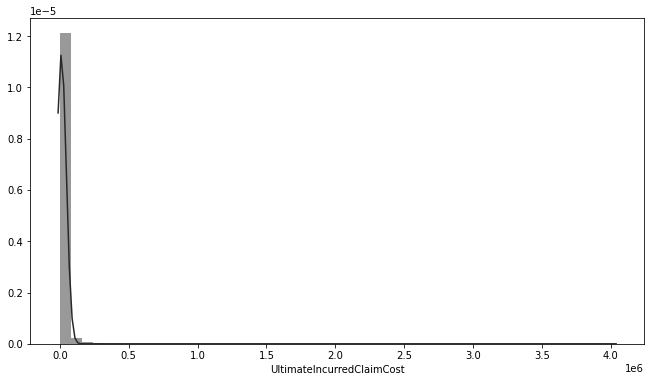

In [30]:
#continuous variables
from scipy.stats import norm
lst_c= [df_new['Age'], df_new['WeeklyWages'], df_new['HoursWorkedPerWeek'], df_new['DaysWorkedPerWeek'],
        df_new['InitialIncurredClaimsCost'],df_new['UltimateIncurredClaimCost']]
for i in lst_c:
    plt.figure(figsize=(11,6))
    sns.distplot(i, fit=norm, kde=False)

- All distributions are positively skewed, which shows all variables have outliers.
- DaysWorkedperweek are negatively skewed.

<AxesSubplot:>

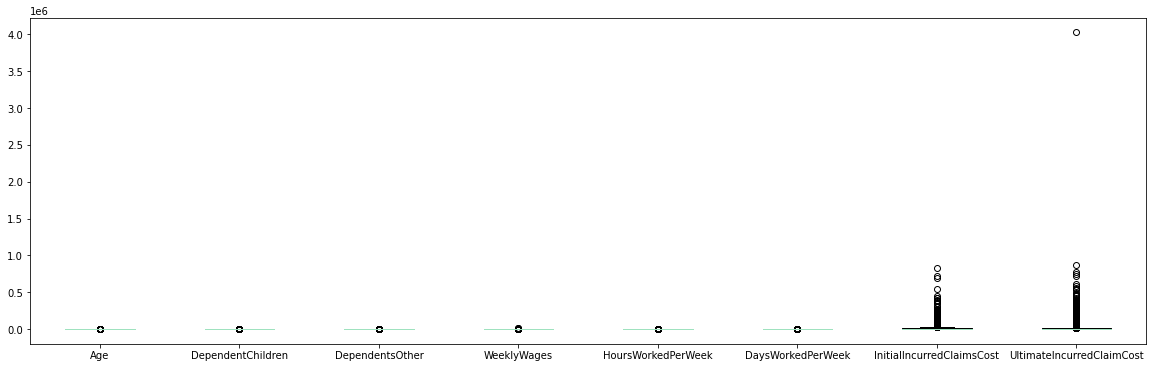

In [31]:
#outlier analysis
df_new.plot.box(figsize=(20,6))

- outliers in all distributions.
- more outliers in initialIncuredclaimscost and ultimateincurredclaimcost

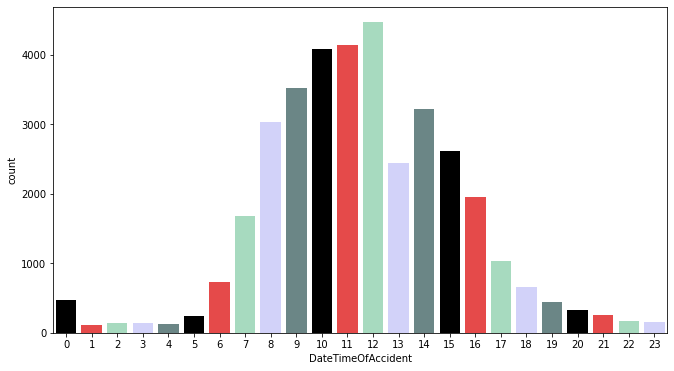

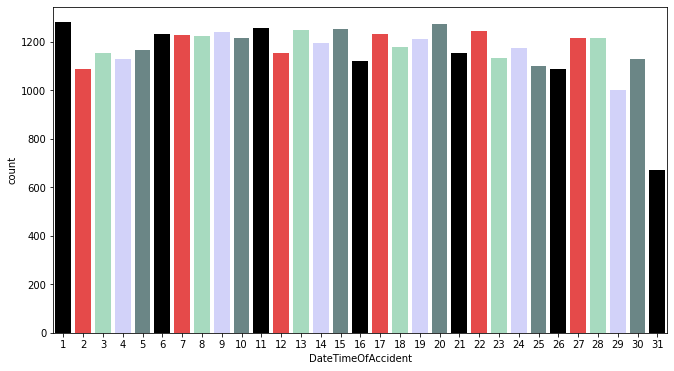

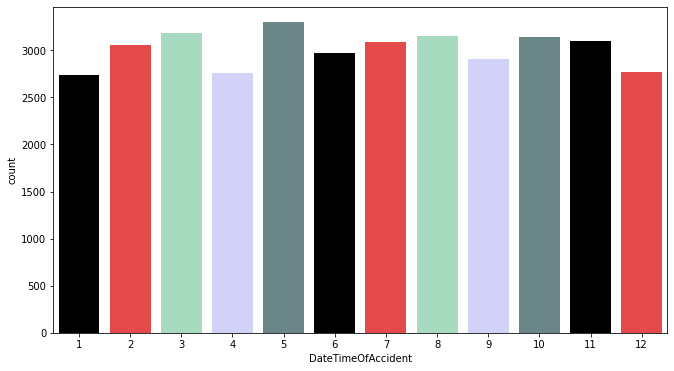

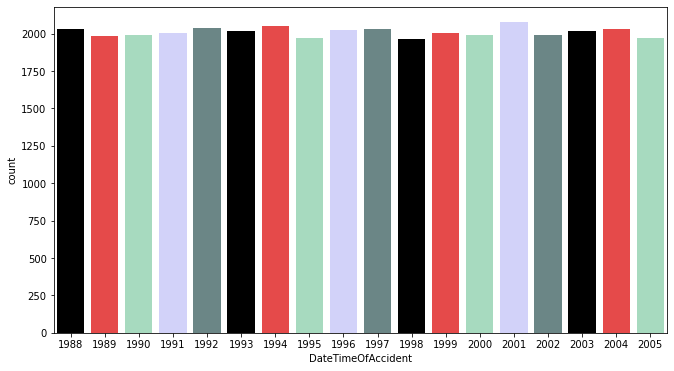

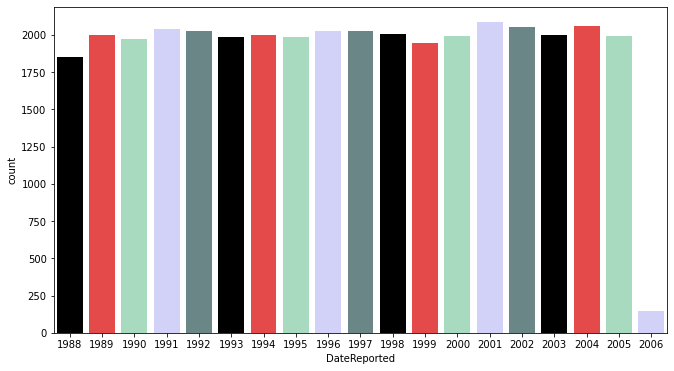

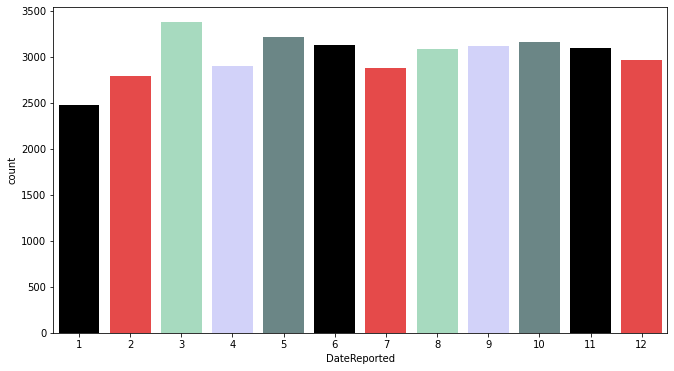

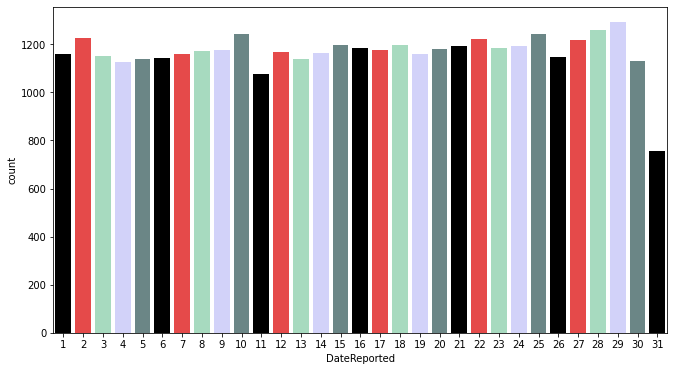

In [32]:
#Analysing Date and time of accident and date and time of accident reported
lst_d=[df_new['DateTimeOfAccident'].dt.hour,df_new['DateTimeOfAccident'].dt.day,df_new['DateTimeOfAccident'].dt.month,
       df_new['DateTimeOfAccident'].dt.year,df_new['DateReported'].dt.year, df_new['DateReported'].dt.month,
       df_new['DateReported'].dt.day ]
for i in lst_d:
    plt.figure(figsize=(11,6))
    sns.countplot(x=i, data=df_new,palette=myPal)

- As expected more accidents  occured in daytime, mostly from 10-12.
- More accidents in the month of may and fewer in January.
- Comparatively, Month beginnings have more accidents compared to month ends.
- Accidents from 1988-2005 in the dataset.
- Probably this dataset taken in year 2006, fewer accidents reported.
- Most accidents reported in the month of March, fewer in January.

As fewer cases occured and reported in January, we may assume that lessaccidents occur in January, probably due to good weather conditions.

<AxesSubplot:xlabel='Gender', ylabel='count'>

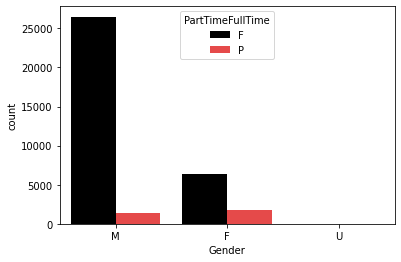

In [33]:
#Bivariate Analysis
#1.Gender
sns.countplot(data=df_new,x='Gender',hue='PartTimeFullTime')

- Comparatively, more female part time workers than males as insurers in the dataset.



<AxesSubplot:xlabel='Gender', ylabel='HoursWorkedPerWeek'>

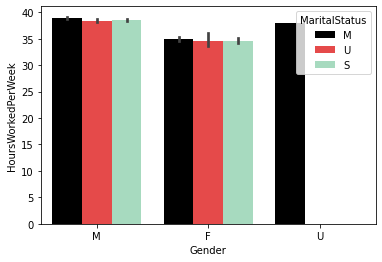

In [34]:
sns.barplot(data=df_new,x=df_new['Gender'],y=df_new['HoursWorkedPerWeek'],hue='MaritalStatus')

- Male insurers works more hours per week than females.
- No significant difference between marital status and weekly working hours.
- Gender unknowns are married ones.

<AxesSubplot:xlabel='Gender', ylabel='DaysWorkedPerWeek'>

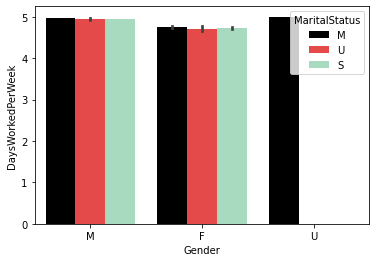

In [35]:
sns.barplot(data=df_new, x=df_new['Gender'], y=df_new['DaysWorkedPerWeek'], hue='MaritalStatus')

- No significant difference between Males and females in working days per week.
- Marital Status and days working are insiggnificant.

From both, we assume that insurers marital status doesnot influence their working.

<AxesSubplot:xlabel='Gender', ylabel='WeeklyWages'>

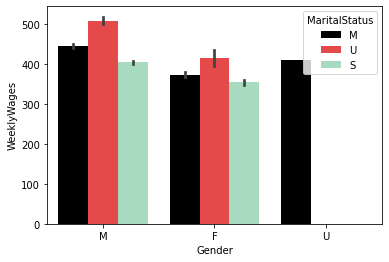

In [36]:
sns.barplot(data=df_new,x=df_new['Gender'],y=df_new['WeeklyWages'],hue='MaritalStatus')

- Weekly wages are comparitively higher for unmarried insurers.
- Men insurers earns more compared to females.

<AxesSubplot:xlabel='Gender', ylabel='UltimateIncurredClaimCost'>

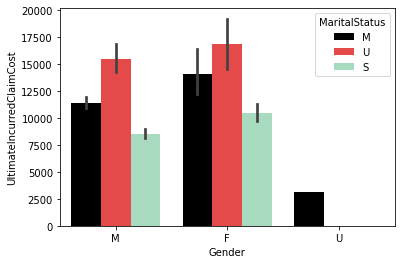

In [37]:
sns.barplot(data=df_new,x=df_new['Gender'],y=df_new['UltimateIncurredClaimCost'],hue='MaritalStatus')

- Total claims payment by the insurance company are more for women insurers. 
- Unmarried insurers have more claimcost, and it maybe due to more weekly wages for them.

Weeklywages maybe correlated with the Ultimateincurredclaimscost

<AxesSubplot:xlabel='Gender', ylabel='InitialIncurredClaimsCost'>

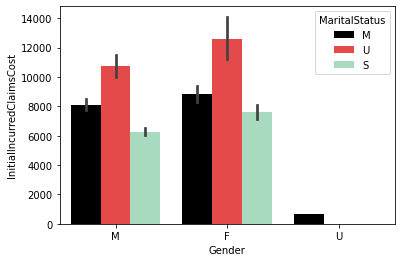

In [38]:
sns.barplot(data=df_new,x=df_new['Gender'],y=df_new['InitialIncurredClaimsCost'],hue='MaritalStatus')

- Initial claimcost have silmilar results of ultimate claimcost.
So both maybe dependent.

In [39]:
#2.Age
# creating bins
df_new['age_bins']=pd.cut(df_new['Age'],bins=[10,20,40,60,80],labels=["Students","Youths","Aged","Old"])

<AxesSubplot:xlabel='age_bins', ylabel='UltimateIncurredClaimCost'>

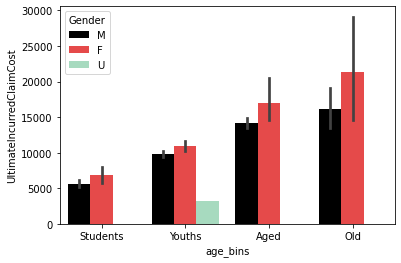

In [40]:
sns.barplot(data=df_new,x=df_new['age_bins'],y=df_new['UltimateIncurredClaimCost'],hue='Gender')

- Gender unknowns are youths.
- Age have a positive relation between total claim amount.

<AxesSubplot:xlabel='age_bins', ylabel='InitialIncurredClaimsCost'>

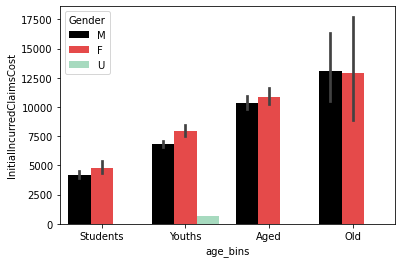

In [41]:
sns.barplot(data=df_new,x=df_new['age_bins'],y=df_new['InitialIncurredClaimsCost'],hue='Gender')

- Similar result of ultimate claim cost

<AxesSubplot:xlabel='age_bins', ylabel='WeeklyWages'>

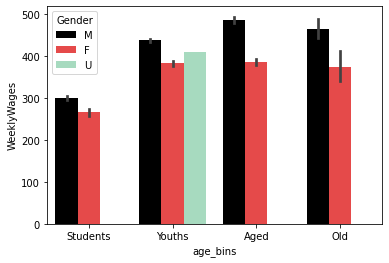

In [42]:
sns.barplot(data=df_new,x=df_new['age_bins'],y=df_new['WeeklyWages'],hue='Gender')

- males earns according to ages
- Females above 20 years earn same.
- As age grows difference in earnings within gender grows.




<AxesSubplot:xlabel='age_bins', ylabel='HoursWorkedPerWeek'>

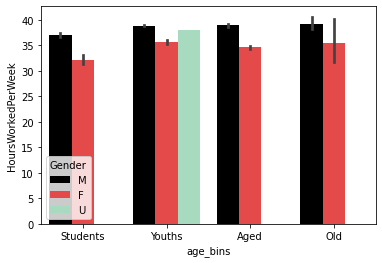

In [43]:
sns.barplot(data=df_new,x=df_new['age_bins'],y=df_new['HoursWorkedPerWeek'],hue='Gender')

- Not much significant difference in age and working hours.

<AxesSubplot:xlabel='age_bins', ylabel='DaysWorkedPerWeek'>

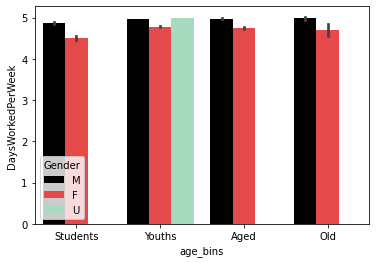

In [44]:
sns.barplot(data=df_new,x=df_new['age_bins'],y=df_new['DaysWorkedPerWeek'],hue='Gender')

Not much significant difference on age and daysworking.

<AxesSubplot:xlabel='DateTimeOfAccident', ylabel='UltimateIncurredClaimCost'>

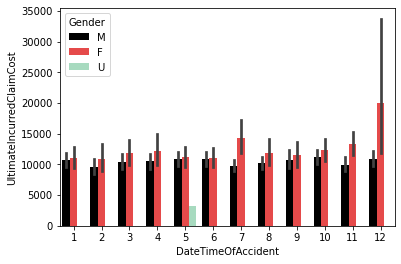

In [45]:
#3.Dateand Time of accidents
sns.barplot(data=df_new,x=df_new['DateTimeOfAccident'].dt.month,y=df_new['UltimateIncurredClaimCost'],hue='Gender')

- Accidents in the moth of January have comparatively more claim amounts among females.
- Females are receiving more claim amounts than females and this may be a charecteristic of the insurance company.

<AxesSubplot:xlabel='DateTimeOfAccident', ylabel='count'>

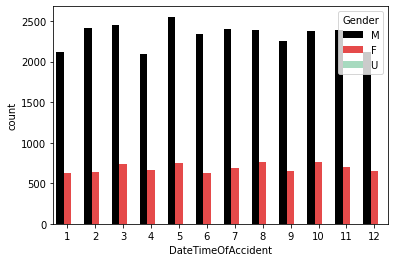

In [46]:
sns.countplot(data=df_new,x=df_new['DateTimeOfAccident'].dt.month,hue='Gender')

- Males had been to accidents mostly than females. But evenththough females have high claim amounts.

<AxesSubplot:xlabel='DateTimeOfAccident', ylabel='UltimateIncurredClaimCost'>

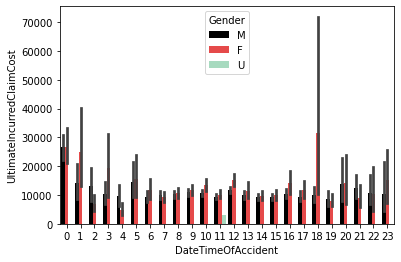

In [47]:
sns.barplot(data=df_new,x=df_new['DateTimeOfAccident'].dt.hour,y=df_new['UltimateIncurredClaimCost'],hue='Gender')

<AxesSubplot:xlabel='DateTimeOfAccident', ylabel='count'>

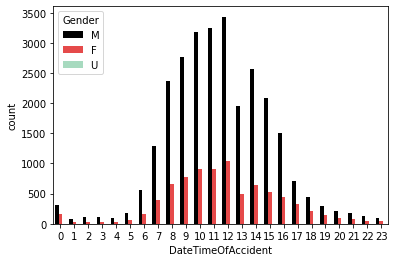

In [48]:
sns.countplot(data=df_new,x=df_new['DateTimeOfAccident'].dt.hour,hue='Gender')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

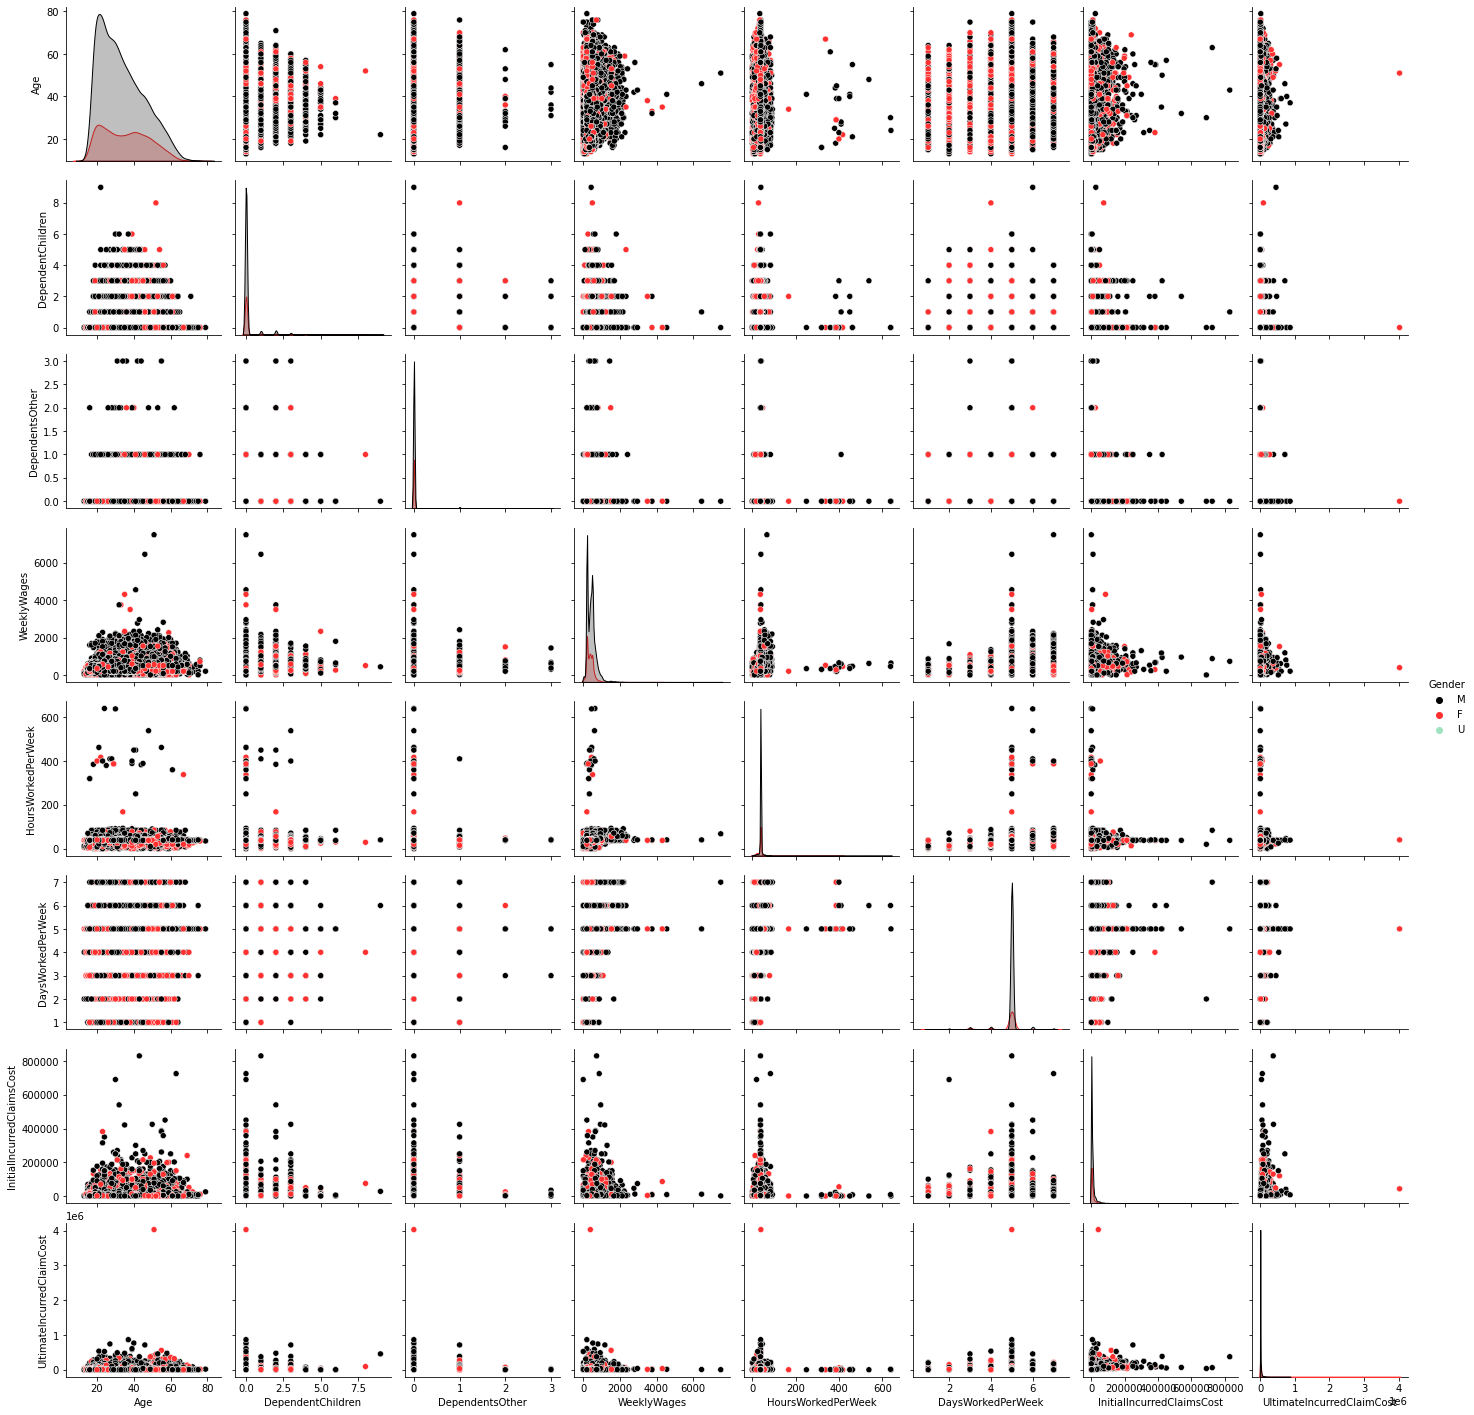

In [49]:
#Multivariate Analysis
list_df=['DateTimeOfAccident', 'DateReported', 'Age', 'Gender',
       'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages',
       'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'ClaimDescription', 'InitialIncurredClaimsCost',
       'UltimateIncurredClaimCost']

sns.pairplot(data=df_new[list_df],hue='Gender',diag_kind='kde')

- We can infer that more male insurers in the dataset.
- And highest claimamounts are for females.

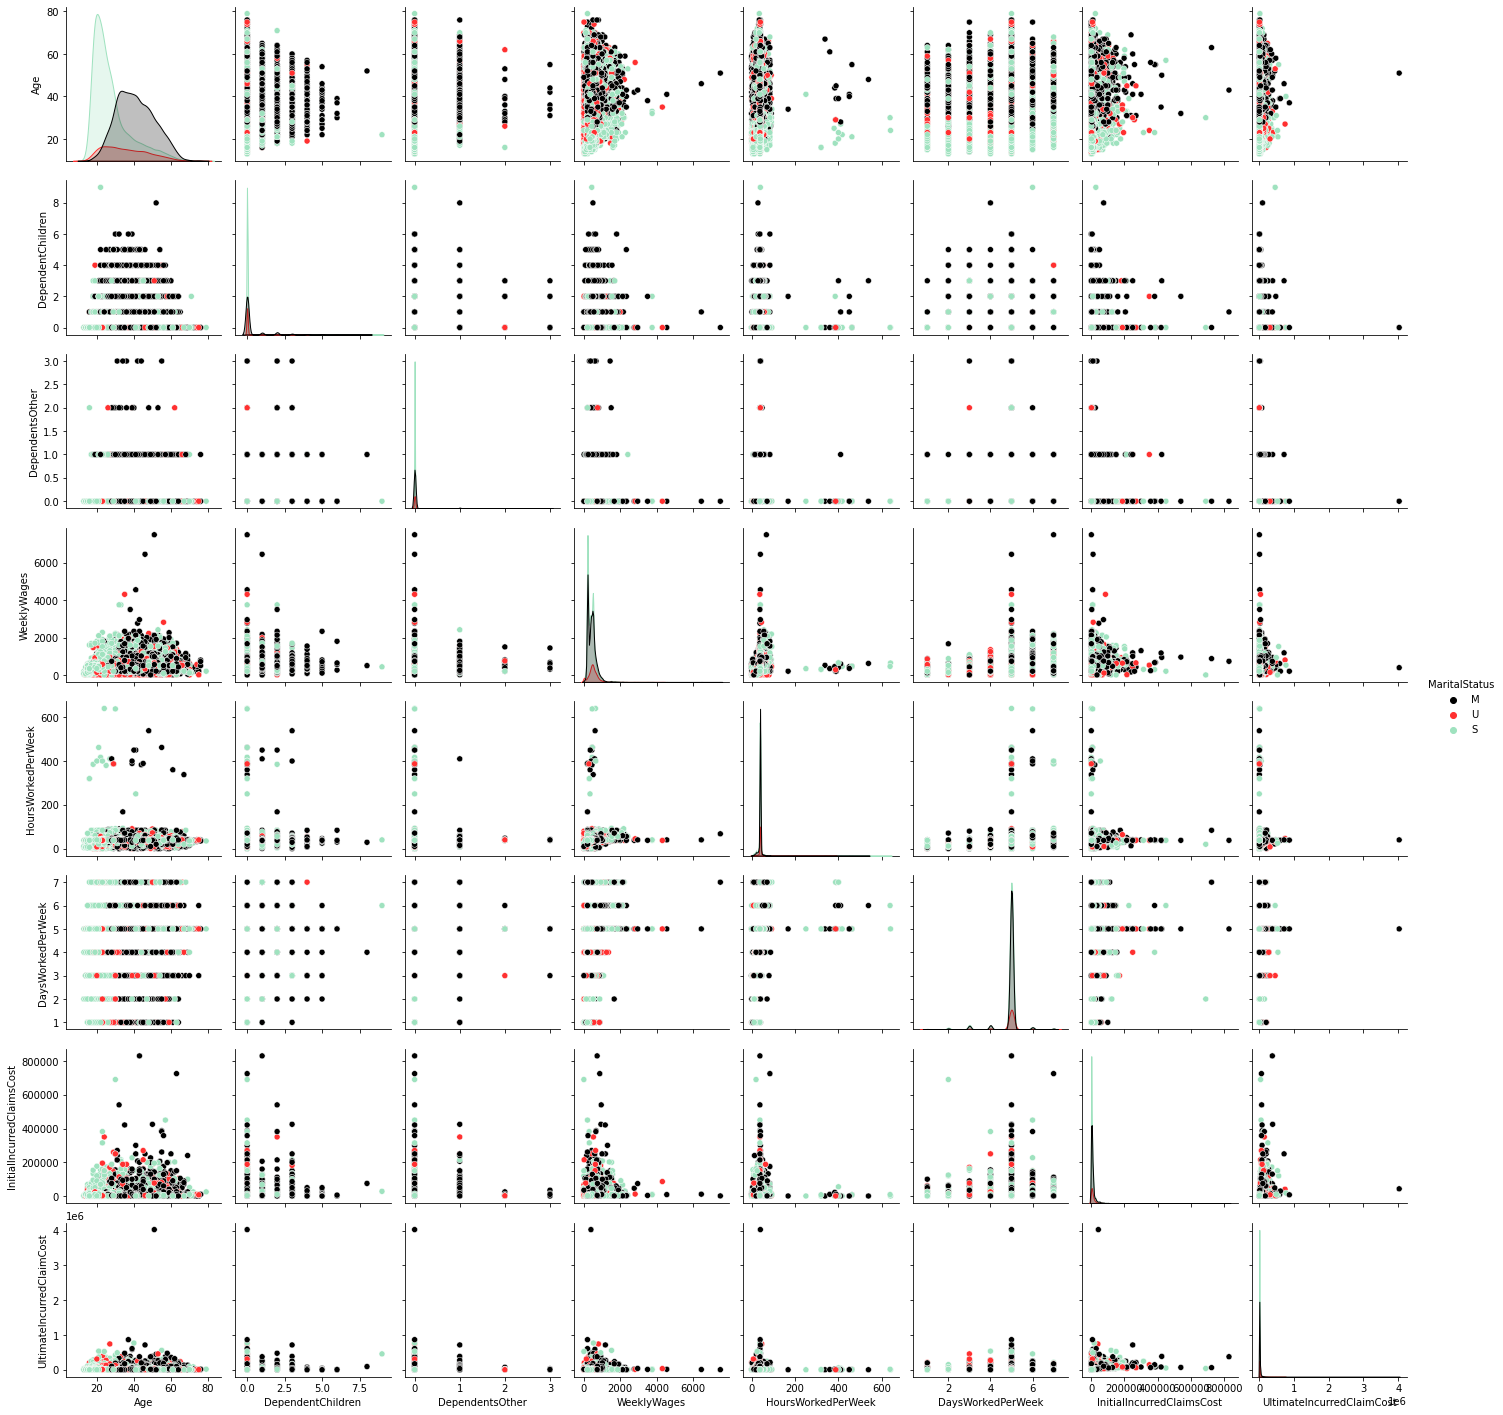

In [50]:
sns.pairplot(data=df_new[list_df],hue='MaritalStatus',diag_kind='kde')

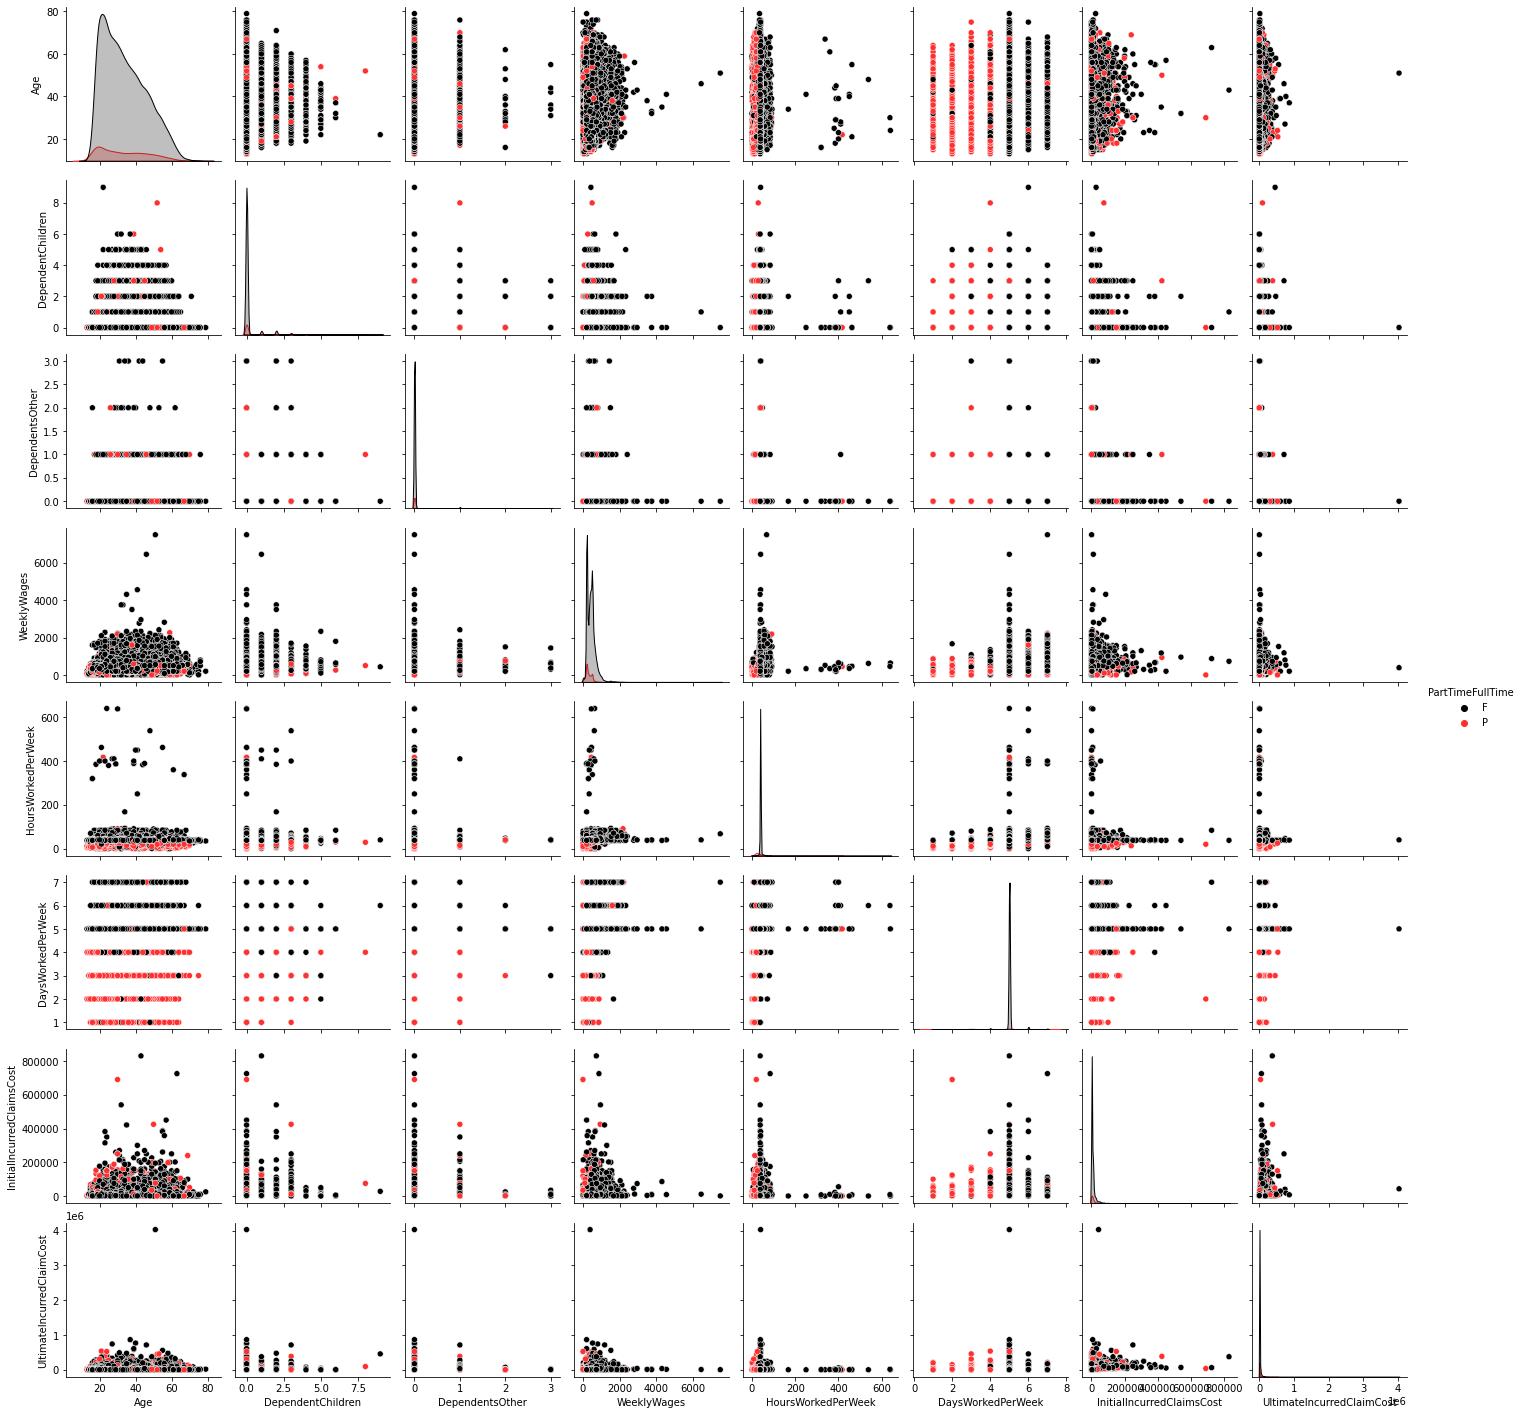

In [51]:
sns.pairplot(data=df_new[list_df],hue='PartTimeFullTime',diag_kind='kde')

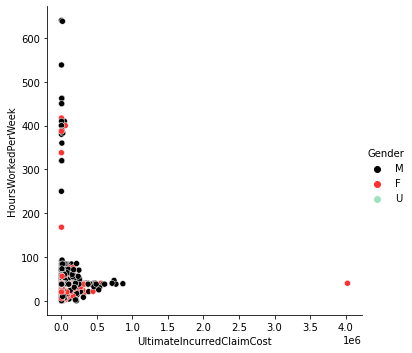

In [52]:
sns.relplot(x='UltimateIncurredClaimCost', y='HoursWorkedPerWeek', hue="Gender", data=df_new)

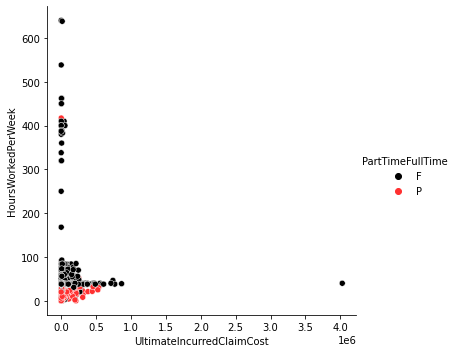

In [53]:
sns.relplot(x='UltimateIncurredClaimCost', y='HoursWorkedPerWeek', hue='PartTimeFullTime', data=df_new)

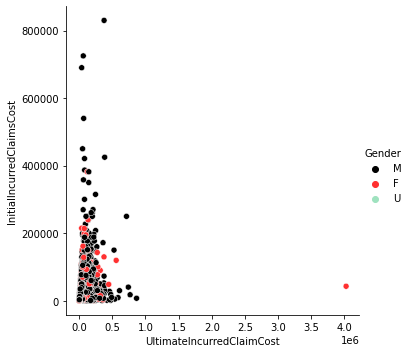

In [54]:
sns.relplot(x='UltimateIncurredClaimCost', y='InitialIncurredClaimsCost', hue="Gender", data=df_new)

- Outlier present which is a female and a full time worker

In [55]:
#Remove outlier
df_new = df_new[df_new.UltimateIncurredClaimCost!= df_new.UltimateIncurredClaimCost.max()]

<AxesSubplot:>

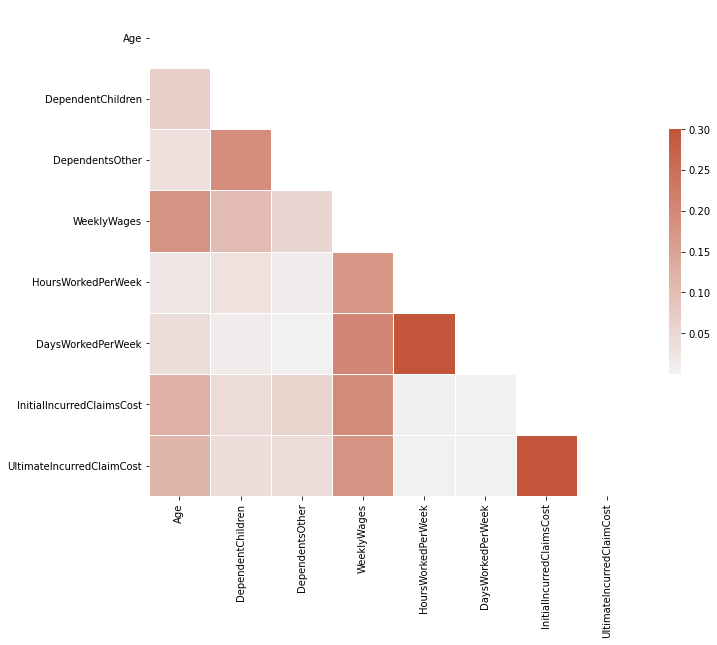

In [56]:
#Checking Correlation
corr = df_new.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- Initialincurredclaimscost, Age, Weekly wages are more correlated with dependentvariable
  which is the ultimateclaimscost.

# Step 4 - Feature Engineering

In [57]:
#From EDA we came to know that accident hours are having more variations,so taking for data modelling.
df_new.info()
df_new['Accident_time']=df_new['DateTimeOfAccident'].dt.hour 
df_new['Accident_time_reported']=df_new['DateReported'].dt.hour

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36175 entries, 0 to 36175
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   ClaimNumber                36175 non-null  object             
 1   DateTimeOfAccident         36175 non-null  datetime64[ns, UTC]
 2   DateReported               36175 non-null  datetime64[ns, UTC]
 3   Age                        36175 non-null  int64              
 4   Gender                     36175 non-null  object             
 5   MaritalStatus              36175 non-null  object             
 6   DependentChildren          36175 non-null  int64              
 7   DependentsOther            36175 non-null  int64              
 8   WeeklyWages                36175 non-null  float64            
 9   PartTimeFullTime           36175 non-null  object             
 10  HoursWorkedPerWeek         36175 non-null  float64            
 11  Da

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [58]:
#Creating a list of columns for data modelling
#Removing Claimnumber and taking accidenttime and accident reported time(fromEDA)
lst_df=[ 'Age', 'Gender', 'MaritalStatus', 'DependentChildren','DependentsOther', 
        'WeeklyWages','PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'ClaimDescription', 'InitialIncurredClaimsCost', 'UltimateIncurredClaimCost',
        'Accident_time','Accident_time_reported']

df_analysis=df_new[lst_df]

In [59]:
#Doing logtransformation as there are outliers
df_analysis['log_UltimateIncurredClaimCost'] = np.log(df_analysis['UltimateIncurredClaimCost'])
df_analysis['log_WeeklyWages'] = np.log(df_analysis['WeeklyWages'])
df_analysis['log_InitialIncurredClaimsCost'] = np.log(df_analysis['InitialIncurredClaimsCost'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [60]:
# Taking new transformed columns.
lst_df1=['Age', 'Gender', 'MaritalStatus', 'DependentChildren','DependentsOther',
       'PartTimeFullTime',  'DaysWorkedPerWeek',
       'ClaimDescription', 'Accident_time_reported',
       'log_UltimateIncurredClaimCost', 'HoursWorkedPerWeek','Accident_time',
       'log_WeeklyWages', 'log_InitialIncurredClaimsCost']
df_analysis=df_analysis[lst_df1]

In [61]:
#Transforming object datatype
le=pre.LabelEncoder()
for x in df_analysis.select_dtypes(include='object').columns.tolist():
    df_analysis[x]=le.fit_transform(df_analysis[x])

In [62]:
#Scaling data
X_scale=pre.minmax_scale(df_analysis.drop('log_UltimateIncurredClaimCost',axis=1))
Y=df_analysis['log_UltimateIncurredClaimCost']
#Creating train and test data
x_train,x_test,y_train,y_test=ms.train_test_split(X_scale,Y,test_size=0.3,random_state=1234456)


Feature: 0, Score: 0.03348
Feature: 1, Score: 0.00392
Feature: 2, Score: 0.00784
Feature: 3, Score: 0.00307
Feature: 4, Score: 0.00062
Feature: 5, Score: 0.00126
Feature: 6, Score: 0.00263
Feature: 7, Score: 0.08437
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.01288
Feature: 10, Score: 0.02367
Feature: 11, Score: 0.04494
Feature: 12, Score: 0.78133


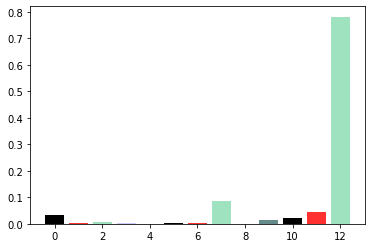

In [63]:
#Feature Selection using Decisiontreeregressor
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
model=DecisionTreeRegressor()
#fit the model
model.fit(x_train,y_train)
#get importance
importance=model.feature_importances_
#summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
#plot feature importance
pyplot.bar([x for x in range(len(importance))], importance,color=myPal)
pyplot.show()


In [64]:
dict(zip(df_analysis.columns.tolist(),importance))
#Removing 'Accident_time_reported'

{'Age': 0.03347952117438418,
 'Gender': 0.003918521682818798,
 'MaritalStatus': 0.00784493919099117,
 'DependentChildren': 0.0030651155051749975,
 'DependentsOther': 0.0006236996054089942,
 'PartTimeFullTime': 0.001259240787529366,
 'DaysWorkedPerWeek': 0.002633196122016506,
 'ClaimDescription': 0.0843672204563955,
 'Accident_time_reported': 0.0,
 'log_UltimateIncurredClaimCost': 0.012877757060376001,
 'HoursWorkedPerWeek': 0.023667137104152546,
 'Accident_time': 0.04493539286970869,
 'log_WeeklyWages': 0.7813282584410433}

# Step 5 - M.L Model

**Linear Regression Model**

In [65]:
#Creating a list of columns for data modelling
#Removing Claimnumber and taking accidenttime and accident reported time(fromEDA)
lst_df=[ 'Age', 'Gender', 'MaritalStatus', 'DependentChildren','DependentsOther',
        'WeeklyWages','PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'ClaimDescription', 'InitialIncurredClaimsCost', 'UltimateIncurredClaimCost',
        'Accident_time','Accident_time_reported']

df_analysis=df_new[lst_df]
#Doing logtransformation as there are outliers
df_analysis['log_UltimateIncurredClaimCost'] = np.log(df_analysis['UltimateIncurredClaimCost'])
df_analysis['log_WeeklyWages'] = np.log(df_analysis['WeeklyWages'])
df_analysis['log_InitialIncurredClaimsCost'] = np.log(df_analysis['InitialIncurredClaimsCost'])

lst_df1=['Age', 'Gender', 'MaritalStatus', 'DependentChildren','DependentsOther',
       'PartTimeFullTime',  'DaysWorkedPerWeek',
       'ClaimDescription', 
       'log_UltimateIncurredClaimCost', 'HoursWorkedPerWeek',
       'log_WeeklyWages', 'log_InitialIncurredClaimsCost']
df_analysis=df_analysis[lst_df1]
#Transforming object datatype
le=pre.LabelEncoder()
for x in df_analysis.select_dtypes(include='object').columns.tolist():
    df_analysis[x]=le.fit_transform(df_analysis[x])
#Scaling data
X_scale=pre.minmax_scale(df_analysis.drop('log_UltimateIncurredClaimCost',axis=1))
Y=df_analysis['log_UltimateIncurredClaimCost']
#Creating train and test data
x_train,x_test,y_train,y_test=ms.train_test_split(X_scale,Y,test_size=0.3,random_state=1234456)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [66]:
import sklearn.linear_model as ln
glm=ln.LinearRegression()
glm.fit(x_train,y_train)


LinearRegression()

In [67]:
glm.score(x_test,y_test)

0.7458471487412045

In [68]:
#Printing results.
print('MSE:', mt.mean_squared_error(y_pred=glm.predict(x_test),y_true=y_test))
print('RMSE: ',mt.mean_squared_error(y_pred=glm.predict(x_test),y_true=y_test)**0.5)
print('MAE:' , mt.mean_absolute_error(y_pred=glm.predict(x_test),y_true=y_test))
print('R2 Score:',mt.r2_score(y_pred=glm.predict(x_test),y_true=y_test))

MSE: 0.5898577987952023
RMSE:  0.7680220041087379
MAE: 0.5418398198784949
R2 Score: 0.7458471487412045


In [69]:
from sklearn.model_selection import cross_val_score
#using 10-fold cross validation 
accuracies = cross_val_score(estimator = glm, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.50 %
Standard Deviation: 1.59 %


**RandomForestRegressor**

In [70]:
# Fitting Random Forest Regression to the dataset

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state =0,max_depth=7)
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, random_state=0)

In [71]:
regressor.score(x_test,y_test)

0.790268682073792

In [72]:
regressor.score(x_train,y_train)

0.803022638986642

In [73]:
#Printing Results.
print('MSE:', mt.mean_squared_error(y_pred=regressor.predict(x_test),y_true=y_test))#normalised error
print('RMSE: ',mt.mean_squared_error(y_pred=regressor.predict(x_test),y_true=y_test)**0.5)
print('MAE:' , mt.mean_absolute_error(y_pred=regressor.predict(x_test),y_true=y_test))
print('R2 Score:',mt.r2_score(y_pred=regressor.predict(x_test),y_true=y_test))

MSE: 0.486760832773024
RMSE:  0.6976824727431699
MAE: 0.48437867992045636
R2 Score: 0.790268682073792


In [74]:
#using 10-fold cross validation 
accuracies = cross_val_score(estimator = regressor, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.87 %
Standard Deviation: 1.30 %


In [75]:
#Load the test data
test_df=pd.read_csv("../input/machine-learning-24-hrs-hackathon/Test_SJC.csv")

In [76]:
#Creating a list of columns for data modelling
#Removing Claimnumber and taking accidenttime and accident reported time(fromEDA)
lst_df=[ 'Age', 'Gender',
       'MaritalStatus', 'DependentChildren','DependentsOther', 'WeeklyWages','PartTimeFullTime',
        'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'ClaimDescription', 'InitialIncurredCalimsCost',
       ]

df_model=test_df[lst_df]
#Doing logtransformation as there are outliers

df_model['log_WeeklyWages'] = np.log(df_model['WeeklyWages'])
df_model['log_InitialIncurredCalimsCost'] = np.log(df_model['InitialIncurredCalimsCost'])

lst_df1=['Age', 'Gender', 'MaritalStatus', 'DependentChildren','DependentsOther',
       'PartTimeFullTime',  'DaysWorkedPerWeek',
       'ClaimDescription', 
        'HoursWorkedPerWeek',
       'log_WeeklyWages', 'log_InitialIncurredCalimsCost']
df_analysis=df_model[lst_df1]
df_analysis['MaritalStatus']=df_analysis['MaritalStatus'].fillna(df_analysis['MaritalStatus'].mode()[0])
#Transforming object datatype
le=pre.LabelEncoder()
for x in df_analysis.select_dtypes(include='object').columns.tolist():
    df_analysis[x]=le.fit_transform(df_analysis[x])
#Scaling data
X_scale=pre.minmax_scale(df_analysis)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [77]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17824 entries, 0 to 17823
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            17824 non-null  int64  
 1   Gender                         17824 non-null  int64  
 2   MaritalStatus                  17824 non-null  int64  
 3   DependentChildren              17824 non-null  int64  
 4   DependentsOther                17824 non-null  int64  
 5   PartTimeFullTime               17824 non-null  int64  
 6   DaysWorkedPerWeek              17824 non-null  int64  
 7   ClaimDescription               17824 non-null  int64  
 8   HoursWorkedPerWeek             17824 non-null  float64
 9   log_WeeklyWages                17824 non-null  float64
 10  log_InitialIncurredCalimsCost  17824 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 1.5 MB


In [78]:
#Re transforming the variable
y=regressor.predict(X_scale)
y_pred=np.exp(y)

In [79]:
#Load samplesubmission file
csv=pd.read_csv("../input/machine-learning-24-hrs-hackathon/sample_submission.csv")
csv['UltimateIncurredClaimCost']=y_pred

In [80]:
#saving as csv file
csv.to_csv("Final Submission.csv",index=False)

# Reason for choosing the model

 This is a Regression problem, so I think of using Regression models.
 Firstly I used Linear Regression model which is the simplest of all the models.
 There were outliers in the dataset. I removed and I also did log transformations.
 To get more consistent result I did K-fold cross validation.
 I got accuracy of 74.5%. Then I tried RandomForestRegression for which I got accuracy of 79%. So Finally i predicted using RandomForestRegression model.

# How it is better than other Models.

My model is better than other models, because there is no overfitting nor underfitting.
I did better outlier treatment and feature engineering techniques. I got a better training  and testing score.  